# Machine Learning Foundation

## Keras Intro

### Using Keras to build and train neural network

### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

In [49]:
# set up
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve,roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [40]:
## Import Keras objects for Deep Learning
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [41]:
## Load in th data set
names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]

diabetes_df=pd.read_csv('data/diabetes.csv', names=names,header=0)
diabetes_df.head()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
diabetes_df.shape

(768, 9)

In [43]:
X=diabetes_df.iloc[:,:-1].values
y=diabetes_df['has_diabetes'].values

In [44]:
# Split the data into train and test(75% and 25%)
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size=0.25,
                                                 random_state=11111)

In [45]:
np.mean(y)

0.3489583333333333

There is about 35% of the patients in this dataset have diabetes, while 65% do not.

### Get baseline performance using Random Forest

In [50]:
## Train rf model
rf_model =RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [51]:
## Make prediction on the test set
## both "hard" prediction and the scores
## (percent of trees voting yes)
y_pred_class_rf=rf_model.predict(X_test)
y_pred_prob_rf=rf_model.predict_proba(X_test)

print("accuracy is {:.3f}".format(accuracy_score(y_test, y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.755
roc-auc is 0.828


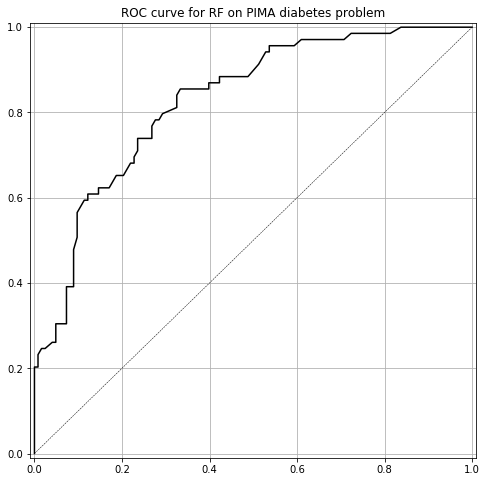

In [52]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr=roc_curve(y_test, y_pred)
    fig, ax=plt.subplots(figsize=(8,8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0,1], [0,1], 'k--', linewidth=.5)
    ax.grid(True)
    ax.set(title='ROC curve for {} on PIMA diabetes problem'.format(model_name),
          xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])

plot_roc(y_test, y_pred_prob_rf[:,1], 'RF')

### Build a single hidden layer neural network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.

In [53]:
## we normalize the data first
## it will aid the numerical stability

normalizer=StandardScaler()
X_train_norm=normalizer.fit_transform(X_train)
X_test_norm=normalizer.transform(X_test)

In [54]:
## define model
## input size is 8dimensional
## 1 hidden layer , 12 hidden nodes sigmoid activation
## final layer has one node with a sigmoid activation

model_1=Sequential()
model_1.add(Dense(12, input_shape=(8,), activation='sigmoid'))
model_1.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [55]:
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 13        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [56]:
## Fit the model
model_1.compile(SGD(lr=.003), "binary_crossentropy", 
                 metrics=["accuracy"])
run_hist_1=model_1.fit(X_train_norm, y_train, 
                       validation_data=(X_test_norm, y_test),
                      epochs=200)

Train on 576 samples, validate on 192 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/200
576/576 [==============================] - 1s 1ms/sample - loss: 0.6524 - acc: 0.6545 - val_loss: 0.6628 - val_acc: 0.6406
Epoch 2/200
576/576 [==============================] - 0s 30us/sample - loss: 0.6513 - acc: 0.6545 - val_loss: 0.6616 - val_acc: 0.6406
Epoch 3/200
576/576 [==============================] - 0s 30us/sample - loss: 0.6502 - acc: 0.6545 - val_loss: 0.6604 - val_acc: 0.6406
Epoch 4/200
576/576 [==============================] - 0s 28us/sample - loss: 0.6492 - acc: 0.6545 - val_loss: 0.6592 - val_acc: 0.6406
Epoch 5/200
576/576 [==============================] - 0s 30us/sample - loss: 0.6482 - acc: 0.6545 - val_loss: 0.6580 - val_acc: 0.6406
Epoch 6/200
576/576 [==============================] - 0s 28us/sample - loss: 0.6471 - acc: 0.6545 - val_loss: 0.6569 - val_acc: 0.6406
Epoch 7/200
576/576 [==============================] - 0s 26us/sample - loss: 0.6461 - acc:

576/576 [==============================] - 0s 24us/sample - loss: 0.6062 - acc: 0.6545 - val_loss: 0.6133 - val_acc: 0.6406
Epoch 59/200
576/576 [==============================] - 0s 30us/sample - loss: 0.6056 - acc: 0.6545 - val_loss: 0.6126 - val_acc: 0.6406
Epoch 60/200
576/576 [==============================] - 0s 26us/sample - loss: 0.6050 - acc: 0.6545 - val_loss: 0.6119 - val_acc: 0.6406
Epoch 61/200
576/576 [==============================] - 0s 28us/sample - loss: 0.6043 - acc: 0.6545 - val_loss: 0.6113 - val_acc: 0.6406
Epoch 62/200
576/576 [==============================] - 0s 24us/sample - loss: 0.6036 - acc: 0.6545 - val_loss: 0.6106 - val_acc: 0.6406
Epoch 63/200
576/576 [==============================] - 0s 28us/sample - loss: 0.6030 - acc: 0.6545 - val_loss: 0.6100 - val_acc: 0.6406
Epoch 64/200
576/576 [==============================] - 0s 24us/sample - loss: 0.6024 - acc: 0.6545 - val_loss: 0.6093 - val_acc: 0.6406
Epoch 65/200
576/576 [==============================] 

Epoch 118/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5728 - acc: 0.6892 - val_loss: 0.5791 - val_acc: 0.6875
Epoch 119/200
576/576 [==============================] - 0s 26us/sample - loss: 0.5723 - acc: 0.6927 - val_loss: 0.5786 - val_acc: 0.6875
Epoch 120/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5718 - acc: 0.6962 - val_loss: 0.5781 - val_acc: 0.6875
Epoch 121/200
576/576 [==============================] - 0s 26us/sample - loss: 0.5714 - acc: 0.6979 - val_loss: 0.5777 - val_acc: 0.6875
Epoch 122/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5709 - acc: 0.6979 - val_loss: 0.5772 - val_acc: 0.6875
Epoch 123/200
576/576 [==============================] - 0s 26us/sample - loss: 0.5704 - acc: 0.6962 - val_loss: 0.5767 - val_acc: 0.6875
Epoch 124/200
576/576 [==============================] - 0s 26us/sample - loss: 0.5700 - acc: 0.6944 - val_loss: 0.5762 - val_acc: 0.6875
Epoch 125/200
576/576 [===========

576/576 [==============================] - 0s 24us/sample - loss: 0.5480 - acc: 0.7135 - val_loss: 0.5545 - val_acc: 0.7240
Epoch 178/200
576/576 [==============================] - 0s 23us/sample - loss: 0.5477 - acc: 0.7188 - val_loss: 0.5541 - val_acc: 0.7240
Epoch 179/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5473 - acc: 0.7188 - val_loss: 0.5537 - val_acc: 0.7240
Epoch 180/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5470 - acc: 0.7205 - val_loss: 0.5534 - val_acc: 0.7240
Epoch 181/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5466 - acc: 0.7205 - val_loss: 0.5530 - val_acc: 0.7240
Epoch 182/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5462 - acc: 0.7205 - val_loss: 0.5527 - val_acc: 0.7240
Epoch 183/200
576/576 [==============================] - 0s 24us/sample - loss: 0.5459 - acc: 0.7222 - val_loss: 0.5523 - val_acc: 0.7240
Epoch 184/200
576/576 [=========================

In [57]:
## Like we did for the Random Forest, we generate two kinds of prediction
## One is hard prediction
## the other is a probabilstic score

y_pred_class_nn_1=model_1.predict_classes(X_test_norm)
y_pred_prob_nn_1=model_1.predict(X_test_norm)

In [58]:
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]])

In [59]:
y_pred_prob_nn_1[:10]

array([[0.37534937],
       [0.5007908 ],
       [0.27101666],
       [0.2614464 ],
       [0.24968278],
       [0.4893297 ],
       [0.22519344],
       [0.298941  ],
       [0.5698062 ],
       [0.32869005]], dtype=float32)

accuracy is 0.750
roc-auc is 0.811


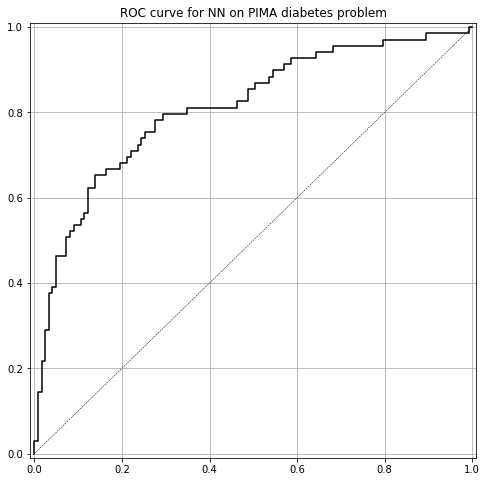

In [60]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

In [61]:
run_hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

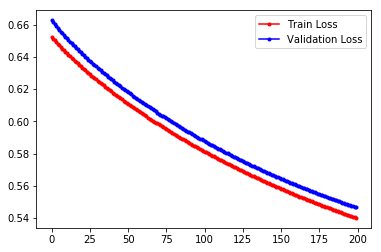

In [62]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()

In [63]:
## we call "fit" again
run_hist_1b = model_1.fit(X_train_norm, y_train, 
                          validation_data=(X_test_norm, y_test), 
                          epochs=1000)

Train on 576 samples, validate on 192 samples
Epoch 1/1000
576/576 [==============================] - 0s 61us/sample - loss: 0.5397 - acc: 0.7326 - val_loss: 0.5463 - val_acc: 0.7500
Epoch 2/1000
576/576 [==============================] - 0s 35us/sample - loss: 0.5394 - acc: 0.7344 - val_loss: 0.5460 - val_acc: 0.7500
Epoch 3/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.5390 - acc: 0.7344 - val_loss: 0.5457 - val_acc: 0.7500
Epoch 4/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.5387 - acc: 0.7344 - val_loss: 0.5454 - val_acc: 0.7448
Epoch 5/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.5384 - acc: 0.7344 - val_loss: 0.5451 - val_acc: 0.7448
Epoch 6/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.5380 - acc: 0.7361 - val_loss: 0.5448 - val_acc: 0.7500
Epoch 7/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.5377 - acc: 0.7361 - val_loss: 0.5445 - val_acc: 0.

576/576 [==============================] - 0s 30us/sample - loss: 0.5224 - acc: 0.7535 - val_loss: 0.5301 - val_acc: 0.7708
Epoch 61/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.5221 - acc: 0.7500 - val_loss: 0.5298 - val_acc: 0.7708
Epoch 62/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.5219 - acc: 0.7535 - val_loss: 0.5296 - val_acc: 0.7708
Epoch 63/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.5216 - acc: 0.7535 - val_loss: 0.5294 - val_acc: 0.7708
Epoch 64/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.5214 - acc: 0.7535 - val_loss: 0.5291 - val_acc: 0.7760
Epoch 65/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.5211 - acc: 0.7535 - val_loss: 0.5289 - val_acc: 0.7760
Epoch 66/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.5209 - acc: 0.7535 - val_loss: 0.5287 - val_acc: 0.7760
Epoch 67/1000
576/576 [=========================

576/576 [==============================] - 0s 24us/sample - loss: 0.5089 - acc: 0.7587 - val_loss: 0.5180 - val_acc: 0.7812
Epoch 120/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.5087 - acc: 0.7587 - val_loss: 0.5178 - val_acc: 0.7812
Epoch 121/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.5085 - acc: 0.7587 - val_loss: 0.5177 - val_acc: 0.7812
Epoch 122/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.5083 - acc: 0.7587 - val_loss: 0.5175 - val_acc: 0.7812
Epoch 123/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.5081 - acc: 0.7604 - val_loss: 0.5173 - val_acc: 0.7812
Epoch 124/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.5079 - acc: 0.7587 - val_loss: 0.5171 - val_acc: 0.7812
Epoch 125/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.5077 - acc: 0.7604 - val_loss: 0.5170 - val_acc: 0.7812
Epoch 126/1000
576/576 [==================

576/576 [==============================] - 0s 23us/sample - loss: 0.4982 - acc: 0.7622 - val_loss: 0.5091 - val_acc: 0.7865
Epoch 179/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4981 - acc: 0.7622 - val_loss: 0.5090 - val_acc: 0.7865
Epoch 180/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4979 - acc: 0.7622 - val_loss: 0.5088 - val_acc: 0.7865
Epoch 181/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4977 - acc: 0.7622 - val_loss: 0.5087 - val_acc: 0.7865
Epoch 182/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4976 - acc: 0.7622 - val_loss: 0.5086 - val_acc: 0.7865
Epoch 183/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4974 - acc: 0.7639 - val_loss: 0.5085 - val_acc: 0.7865
Epoch 184/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4973 - acc: 0.7656 - val_loss: 0.5083 - val_acc: 0.7865
Epoch 185/1000
576/576 [==================

576/576 [==============================] - 0s 24us/sample - loss: 0.4898 - acc: 0.7726 - val_loss: 0.5026 - val_acc: 0.7865
Epoch 238/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4896 - acc: 0.7726 - val_loss: 0.5025 - val_acc: 0.7865
Epoch 239/1000
576/576 [==============================] - 0s 30us/sample - loss: 0.4895 - acc: 0.7726 - val_loss: 0.5024 - val_acc: 0.7917
Epoch 240/1000
576/576 [==============================] - 0s 30us/sample - loss: 0.4894 - acc: 0.7726 - val_loss: 0.5023 - val_acc: 0.7917
Epoch 241/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4893 - acc: 0.7726 - val_loss: 0.5022 - val_acc: 0.7917
Epoch 242/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4891 - acc: 0.7726 - val_loss: 0.5021 - val_acc: 0.7917
Epoch 243/1000
576/576 [==============================] - 0s 30us/sample - loss: 0.4890 - acc: 0.7726 - val_loss: 0.5020 - val_acc: 0.7917
Epoch 244/1000
576/576 [==================

576/576 [==============================] - 0s 24us/sample - loss: 0.4830 - acc: 0.7760 - val_loss: 0.4978 - val_acc: 0.7760
Epoch 297/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4829 - acc: 0.7760 - val_loss: 0.4977 - val_acc: 0.7760
Epoch 298/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4828 - acc: 0.7760 - val_loss: 0.4976 - val_acc: 0.7760
Epoch 299/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4827 - acc: 0.7760 - val_loss: 0.4976 - val_acc: 0.7760
Epoch 300/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4826 - acc: 0.7760 - val_loss: 0.4975 - val_acc: 0.7760
Epoch 301/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4826 - acc: 0.7760 - val_loss: 0.4974 - val_acc: 0.7760
Epoch 302/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4825 - acc: 0.7760 - val_loss: 0.4974 - val_acc: 0.7760
Epoch 303/1000
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4777 - acc: 0.7743 - val_loss: 0.4943 - val_acc: 0.7708
Epoch 356/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4776 - acc: 0.7743 - val_loss: 0.4942 - val_acc: 0.7708
Epoch 357/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4776 - acc: 0.7743 - val_loss: 0.4942 - val_acc: 0.7708
Epoch 358/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4775 - acc: 0.7743 - val_loss: 0.4941 - val_acc: 0.7708
Epoch 359/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4774 - acc: 0.7743 - val_loss: 0.4941 - val_acc: 0.7656
Epoch 360/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4773 - acc: 0.7743 - val_loss: 0.4940 - val_acc: 0.7656
Epoch 361/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4772 - acc: 0.7743 - val_loss: 0.4940 - val_acc: 0.7656
Epoch 362/1000
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4734 - acc: 0.7778 - val_loss: 0.4918 - val_acc: 0.7656
Epoch 415/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4734 - acc: 0.7778 - val_loss: 0.4917 - val_acc: 0.7656
Epoch 416/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4733 - acc: 0.7778 - val_loss: 0.4917 - val_acc: 0.7656
Epoch 417/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4732 - acc: 0.7778 - val_loss: 0.4917 - val_acc: 0.7656
Epoch 418/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4731 - acc: 0.7778 - val_loss: 0.4916 - val_acc: 0.7656
Epoch 419/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4731 - acc: 0.7778 - val_loss: 0.4916 - val_acc: 0.7656
Epoch 420/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4730 - acc: 0.7778 - val_loss: 0.4915 - val_acc: 0.7656
Epoch 421/1000
576/576 [==================

576/576 [==============================] - 0s 24us/sample - loss: 0.4700 - acc: 0.7778 - val_loss: 0.4900 - val_acc: 0.7656
Epoch 474/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4699 - acc: 0.7778 - val_loss: 0.4899 - val_acc: 0.7656
Epoch 475/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4699 - acc: 0.7778 - val_loss: 0.4899 - val_acc: 0.7656
Epoch 476/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4698 - acc: 0.7778 - val_loss: 0.4899 - val_acc: 0.7656
Epoch 477/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4698 - acc: 0.7778 - val_loss: 0.4899 - val_acc: 0.7656
Epoch 478/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4697 - acc: 0.7778 - val_loss: 0.4898 - val_acc: 0.7656
Epoch 479/1000
576/576 [==============================] - 0s 30us/sample - loss: 0.4697 - acc: 0.7778 - val_loss: 0.4898 - val_acc: 0.7656
Epoch 480/1000
576/576 [==================

576/576 [==============================] - 0s 24us/sample - loss: 0.4672 - acc: 0.7778 - val_loss: 0.4887 - val_acc: 0.7604
Epoch 533/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4672 - acc: 0.7778 - val_loss: 0.4887 - val_acc: 0.7604
Epoch 534/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4671 - acc: 0.7778 - val_loss: 0.4887 - val_acc: 0.7604
Epoch 535/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4671 - acc: 0.7795 - val_loss: 0.4887 - val_acc: 0.7604
Epoch 536/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4671 - acc: 0.7778 - val_loss: 0.4886 - val_acc: 0.7604
Epoch 537/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4670 - acc: 0.7778 - val_loss: 0.4886 - val_acc: 0.7604
Epoch 538/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4670 - acc: 0.7778 - val_loss: 0.4886 - val_acc: 0.7604
Epoch 539/1000
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4650 - acc: 0.7812 - val_loss: 0.4879 - val_acc: 0.7604
Epoch 592/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4650 - acc: 0.7830 - val_loss: 0.4879 - val_acc: 0.7604
Epoch 593/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4649 - acc: 0.7812 - val_loss: 0.4878 - val_acc: 0.7604
Epoch 594/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4649 - acc: 0.7830 - val_loss: 0.4878 - val_acc: 0.7604
Epoch 595/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4649 - acc: 0.7812 - val_loss: 0.4878 - val_acc: 0.7604
Epoch 596/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4648 - acc: 0.7812 - val_loss: 0.4878 - val_acc: 0.7604
Epoch 597/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4648 - acc: 0.7812 - val_loss: 0.4878 - val_acc: 0.7604
Epoch 598/1000
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4632 - acc: 0.7778 - val_loss: 0.4873 - val_acc: 0.7604
Epoch 651/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4632 - acc: 0.7778 - val_loss: 0.4873 - val_acc: 0.7604
Epoch 652/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4632 - acc: 0.7778 - val_loss: 0.4873 - val_acc: 0.7604
Epoch 653/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4631 - acc: 0.7778 - val_loss: 0.4873 - val_acc: 0.7604
Epoch 654/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4631 - acc: 0.7778 - val_loss: 0.4873 - val_acc: 0.7604
Epoch 655/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4631 - acc: 0.7778 - val_loss: 0.4873 - val_acc: 0.7604
Epoch 656/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4630 - acc: 0.7778 - val_loss: 0.4873 - val_acc: 0.7604
Epoch 657/1000
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4617 - acc: 0.7812 - val_loss: 0.4870 - val_acc: 0.7604
Epoch 710/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4617 - acc: 0.7812 - val_loss: 0.4870 - val_acc: 0.7604
Epoch 711/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4617 - acc: 0.7812 - val_loss: 0.4870 - val_acc: 0.7604
Epoch 712/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4617 - acc: 0.7812 - val_loss: 0.4870 - val_acc: 0.7604
Epoch 713/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4617 - acc: 0.7812 - val_loss: 0.4870 - val_acc: 0.7604
Epoch 714/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4616 - acc: 0.7812 - val_loss: 0.4870 - val_acc: 0.7604
Epoch 715/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4616 - acc: 0.7812 - val_loss: 0.4870 - val_acc: 0.7604
Epoch 716/1000
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4605 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 769/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4605 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 770/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4605 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 771/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4605 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 772/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4604 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 773/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4604 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 774/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4604 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 775/1000
576/576 [==================

576/576 [==============================] - 0s 24us/sample - loss: 0.4595 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 828/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4595 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 829/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4595 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 830/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4595 - acc: 0.7795 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 831/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4595 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 832/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4594 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 833/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4594 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7604
Epoch 834/1000
576/576 [==================

576/576 [==============================] - 0s 24us/sample - loss: 0.4587 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7656
Epoch 887/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4587 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7656
Epoch 888/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4586 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7656
Epoch 889/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4587 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7656
Epoch 890/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4586 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7656
Epoch 891/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4586 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7656
Epoch 892/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4586 - acc: 0.7812 - val_loss: 0.4868 - val_acc: 0.7656
Epoch 893/1000
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4579 - acc: 0.7795 - val_loss: 0.4869 - val_acc: 0.7656
Epoch 946/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4579 - acc: 0.7795 - val_loss: 0.4869 - val_acc: 0.7656
Epoch 947/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4579 - acc: 0.7795 - val_loss: 0.4869 - val_acc: 0.7656
Epoch 948/1000
576/576 [==============================] - 0s 24us/sample - loss: 0.4579 - acc: 0.7795 - val_loss: 0.4869 - val_acc: 0.7656
Epoch 949/1000
576/576 [==============================] - 0s 26us/sample - loss: 0.4579 - acc: 0.7795 - val_loss: 0.4869 - val_acc: 0.7656
Epoch 950/1000
576/576 [==============================] - 0s 28us/sample - loss: 0.4579 - acc: 0.7795 - val_loss: 0.4869 - val_acc: 0.7656
Epoch 951/1000
576/576 [==============================] - 0s 23us/sample - loss: 0.4579 - acc: 0.7795 - val_loss: 0.4869 - val_acc: 0.7656
Epoch 952/1000
576/576 [==================

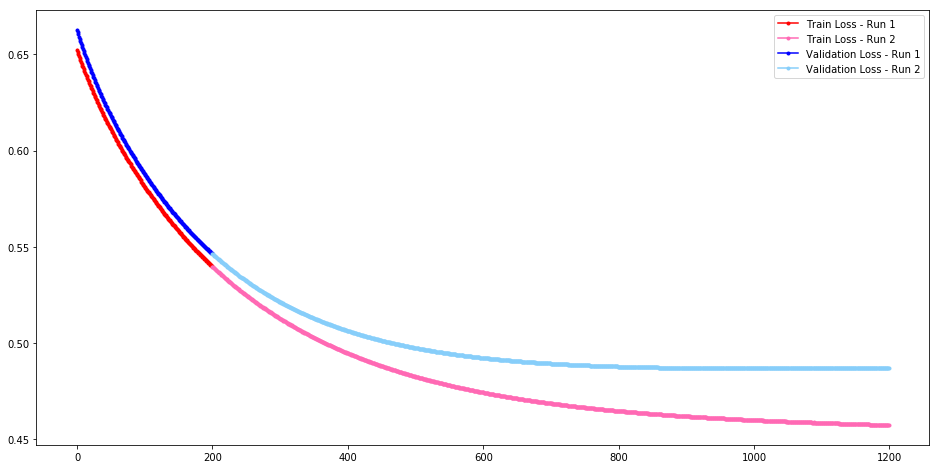

In [64]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

In [65]:
model_2=Sequential()
model_2.add(Dense(6, input_shape=(8,), activation='relu'))
model_2.add(Dense(6, input_shape=(6,), activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [66]:
model_2.compile(SGD(lr=.003), "binary_crossentropy", 
                 metrics=["accuracy"])
run_hist_2=model_2.fit(X_train_norm, y_train, 
                       validation_data=(X_test_norm, y_test),
                      epochs=1500)

Train on 576 samples, validate on 192 samples
Epoch 1/1500
576/576 [==============================] - 0s 326us/sample - loss: 0.7524 - acc: 0.4219 - val_loss: 0.7314 - val_acc: 0.4219
Epoch 2/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.7446 - acc: 0.4236 - val_loss: 0.7251 - val_acc: 0.4427
Epoch 3/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.7373 - acc: 0.4219 - val_loss: 0.7191 - val_acc: 0.4635
Epoch 4/1500
576/576 [==============================] - 0s 35us/sample - loss: 0.7302 - acc: 0.4306 - val_loss: 0.7134 - val_acc: 0.4740
Epoch 5/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.7236 - acc: 0.4358 - val_loss: 0.7079 - val_acc: 0.4948
Epoch 6/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.7174 - acc: 0.4479 - val_loss: 0.7027 - val_acc: 0.5104
Epoch 7/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.7115 - acc: 0.4549 - val_loss: 0.6977 - val_acc: 0

576/576 [==============================] - 0s 28us/sample - loss: 0.5947 - acc: 0.6979 - val_loss: 0.5918 - val_acc: 0.7188
Epoch 61/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.5937 - acc: 0.6997 - val_loss: 0.5907 - val_acc: 0.7188
Epoch 62/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5927 - acc: 0.6997 - val_loss: 0.5897 - val_acc: 0.7188
Epoch 63/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5917 - acc: 0.6997 - val_loss: 0.5886 - val_acc: 0.7240
Epoch 64/1500
576/576 [==============================] - 0s 35us/sample - loss: 0.5906 - acc: 0.7014 - val_loss: 0.5876 - val_acc: 0.7240
Epoch 65/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.5897 - acc: 0.7014 - val_loss: 0.5866 - val_acc: 0.7240
Epoch 66/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5887 - acc: 0.6997 - val_loss: 0.5856 - val_acc: 0.7240
Epoch 67/1500
576/576 [=========================

576/576 [==============================] - 0s 30us/sample - loss: 0.5423 - acc: 0.7257 - val_loss: 0.5405 - val_acc: 0.7396
Epoch 120/1500
576/576 [==============================] - 0s 35us/sample - loss: 0.5415 - acc: 0.7257 - val_loss: 0.5398 - val_acc: 0.7396
Epoch 121/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.5407 - acc: 0.7257 - val_loss: 0.5391 - val_acc: 0.7396
Epoch 122/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.5399 - acc: 0.7274 - val_loss: 0.5384 - val_acc: 0.7396
Epoch 123/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5392 - acc: 0.7274 - val_loss: 0.5377 - val_acc: 0.7344
Epoch 124/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5384 - acc: 0.7309 - val_loss: 0.5370 - val_acc: 0.7344
Epoch 125/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.5375 - acc: 0.7309 - val_loss: 0.5364 - val_acc: 0.7396
Epoch 126/1500
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.5029 - acc: 0.7517 - val_loss: 0.5096 - val_acc: 0.7656
Epoch 179/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.5024 - acc: 0.7517 - val_loss: 0.5093 - val_acc: 0.7708
Epoch 180/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5020 - acc: 0.7500 - val_loss: 0.5089 - val_acc: 0.7656
Epoch 181/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.5015 - acc: 0.7500 - val_loss: 0.5086 - val_acc: 0.7656
Epoch 182/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5010 - acc: 0.7517 - val_loss: 0.5083 - val_acc: 0.7656
Epoch 183/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.5005 - acc: 0.7535 - val_loss: 0.5080 - val_acc: 0.7656
Epoch 184/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.5000 - acc: 0.7552 - val_loss: 0.5077 - val_acc: 0.7656
Epoch 185/1500
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4798 - acc: 0.7604 - val_loss: 0.4972 - val_acc: 0.7656
Epoch 238/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4794 - acc: 0.7587 - val_loss: 0.4971 - val_acc: 0.7656
Epoch 239/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4791 - acc: 0.7587 - val_loss: 0.4970 - val_acc: 0.7656
Epoch 240/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4788 - acc: 0.7587 - val_loss: 0.4969 - val_acc: 0.7656
Epoch 241/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4785 - acc: 0.7587 - val_loss: 0.4968 - val_acc: 0.7708
Epoch 242/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4782 - acc: 0.7587 - val_loss: 0.4967 - val_acc: 0.7708
Epoch 243/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4779 - acc: 0.7569 - val_loss: 0.4966 - val_acc: 0.7708
Epoch 244/1500
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4658 - acc: 0.7639 - val_loss: 0.4936 - val_acc: 0.7708
Epoch 297/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4657 - acc: 0.7656 - val_loss: 0.4936 - val_acc: 0.7708
Epoch 298/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4655 - acc: 0.7674 - val_loss: 0.4936 - val_acc: 0.7708
Epoch 299/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4654 - acc: 0.7639 - val_loss: 0.4935 - val_acc: 0.7708
Epoch 300/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4652 - acc: 0.7656 - val_loss: 0.4935 - val_acc: 0.7708
Epoch 301/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4650 - acc: 0.7639 - val_loss: 0.4935 - val_acc: 0.7708
Epoch 302/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4649 - acc: 0.7656 - val_loss: 0.4935 - val_acc: 0.7708
Epoch 303/1500
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4582 - acc: 0.7674 - val_loss: 0.4928 - val_acc: 0.7760
Epoch 356/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4581 - acc: 0.7674 - val_loss: 0.4928 - val_acc: 0.7760
Epoch 357/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4580 - acc: 0.7674 - val_loss: 0.4928 - val_acc: 0.7760
Epoch 358/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4579 - acc: 0.7691 - val_loss: 0.4928 - val_acc: 0.7760
Epoch 359/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4577 - acc: 0.7674 - val_loss: 0.4927 - val_acc: 0.7760
Epoch 360/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4576 - acc: 0.7691 - val_loss: 0.4927 - val_acc: 0.7760
Epoch 361/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4575 - acc: 0.7674 - val_loss: 0.4927 - val_acc: 0.7760
Epoch 362/1500
576/576 [==================

576/576 [==============================] - 0s 30us/sample - loss: 0.4519 - acc: 0.7760 - val_loss: 0.4923 - val_acc: 0.7865
Epoch 415/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4518 - acc: 0.7743 - val_loss: 0.4923 - val_acc: 0.7865
Epoch 416/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4517 - acc: 0.7743 - val_loss: 0.4923 - val_acc: 0.7865
Epoch 417/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4516 - acc: 0.7760 - val_loss: 0.4924 - val_acc: 0.7865
Epoch 418/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4515 - acc: 0.7743 - val_loss: 0.4924 - val_acc: 0.7865
Epoch 419/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4514 - acc: 0.7760 - val_loss: 0.4924 - val_acc: 0.7865
Epoch 420/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4513 - acc: 0.7760 - val_loss: 0.4924 - val_acc: 0.7865
Epoch 421/1500
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4472 - acc: 0.7743 - val_loss: 0.4927 - val_acc: 0.7917
Epoch 474/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4471 - acc: 0.7743 - val_loss: 0.4927 - val_acc: 0.7917
Epoch 475/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4470 - acc: 0.7743 - val_loss: 0.4927 - val_acc: 0.7917
Epoch 476/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4470 - acc: 0.7743 - val_loss: 0.4927 - val_acc: 0.7917
Epoch 477/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4469 - acc: 0.7743 - val_loss: 0.4927 - val_acc: 0.7917
Epoch 478/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4469 - acc: 0.7743 - val_loss: 0.4927 - val_acc: 0.7917
Epoch 479/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4469 - acc: 0.7743 - val_loss: 0.4927 - val_acc: 0.7917
Epoch 480/1500
576/576 [==================

576/576 [==============================] - 0s 24us/sample - loss: 0.4443 - acc: 0.7726 - val_loss: 0.4934 - val_acc: 0.7865
Epoch 533/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4443 - acc: 0.7760 - val_loss: 0.4934 - val_acc: 0.7865
Epoch 534/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4443 - acc: 0.7743 - val_loss: 0.4934 - val_acc: 0.7865
Epoch 535/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4442 - acc: 0.7743 - val_loss: 0.4934 - val_acc: 0.7865
Epoch 536/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4441 - acc: 0.7743 - val_loss: 0.4934 - val_acc: 0.7865
Epoch 537/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4441 - acc: 0.7726 - val_loss: 0.4934 - val_acc: 0.7865
Epoch 538/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4441 - acc: 0.7726 - val_loss: 0.4934 - val_acc: 0.7865
Epoch 539/1500
576/576 [==================

576/576 [==============================] - 0s 28us/sample - loss: 0.4422 - acc: 0.7778 - val_loss: 0.4939 - val_acc: 0.7708
Epoch 592/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4421 - acc: 0.7795 - val_loss: 0.4939 - val_acc: 0.7708
Epoch 593/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4421 - acc: 0.7778 - val_loss: 0.4939 - val_acc: 0.7708
Epoch 594/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4420 - acc: 0.7778 - val_loss: 0.4939 - val_acc: 0.7708
Epoch 595/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4421 - acc: 0.7760 - val_loss: 0.4940 - val_acc: 0.7708
Epoch 596/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4420 - acc: 0.7778 - val_loss: 0.4940 - val_acc: 0.7708
Epoch 597/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4420 - acc: 0.7778 - val_loss: 0.4940 - val_acc: 0.7708
Epoch 598/1500
576/576 [==================

576/576 [==============================] - 0s 30us/sample - loss: 0.4403 - acc: 0.7778 - val_loss: 0.4946 - val_acc: 0.7604
Epoch 651/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4404 - acc: 0.7795 - val_loss: 0.4946 - val_acc: 0.7604
Epoch 652/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4403 - acc: 0.7795 - val_loss: 0.4946 - val_acc: 0.7604
Epoch 653/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4403 - acc: 0.7778 - val_loss: 0.4946 - val_acc: 0.7604
Epoch 654/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4403 - acc: 0.7778 - val_loss: 0.4946 - val_acc: 0.7604
Epoch 655/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4402 - acc: 0.7760 - val_loss: 0.4947 - val_acc: 0.7604
Epoch 656/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4402 - acc: 0.7760 - val_loss: 0.4947 - val_acc: 0.7604
Epoch 657/1500
576/576 [==================

Epoch 709/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4388 - acc: 0.7795 - val_loss: 0.4957 - val_acc: 0.7708
Epoch 710/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4388 - acc: 0.7795 - val_loss: 0.4957 - val_acc: 0.7708
Epoch 711/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4388 - acc: 0.7795 - val_loss: 0.4958 - val_acc: 0.7708
Epoch 712/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4387 - acc: 0.7795 - val_loss: 0.4958 - val_acc: 0.7708
Epoch 713/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4387 - acc: 0.7795 - val_loss: 0.4958 - val_acc: 0.7708
Epoch 714/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4387 - acc: 0.7795 - val_loss: 0.4958 - val_acc: 0.7708
Epoch 715/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4387 - acc: 0.7778 - val_loss: 0.4959 - val_acc: 0.7708
Epoch 716/1500
576/576 [===

Epoch 768/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4374 - acc: 0.7830 - val_loss: 0.4972 - val_acc: 0.7708
Epoch 769/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4374 - acc: 0.7830 - val_loss: 0.4972 - val_acc: 0.7708
Epoch 770/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4373 - acc: 0.7830 - val_loss: 0.4972 - val_acc: 0.7708
Epoch 771/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4373 - acc: 0.7778 - val_loss: 0.4972 - val_acc: 0.7708
Epoch 772/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4372 - acc: 0.7812 - val_loss: 0.4972 - val_acc: 0.7708
Epoch 773/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4372 - acc: 0.7830 - val_loss: 0.4973 - val_acc: 0.7708
Epoch 774/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4372 - acc: 0.7812 - val_loss: 0.4973 - val_acc: 0.7708
Epoch 775/1500
576/576 [===

Epoch 827/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4360 - acc: 0.7778 - val_loss: 0.4988 - val_acc: 0.7656
Epoch 828/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4360 - acc: 0.7778 - val_loss: 0.4988 - val_acc: 0.7656
Epoch 829/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4359 - acc: 0.7778 - val_loss: 0.4988 - val_acc: 0.7656
Epoch 830/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4360 - acc: 0.7778 - val_loss: 0.4988 - val_acc: 0.7656
Epoch 831/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4359 - acc: 0.7778 - val_loss: 0.4989 - val_acc: 0.7656
Epoch 832/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4359 - acc: 0.7778 - val_loss: 0.4989 - val_acc: 0.7656
Epoch 833/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4359 - acc: 0.7778 - val_loss: 0.4989 - val_acc: 0.7656
Epoch 834/1500
576/576 [===

576/576 [==============================] - 0s 30us/sample - loss: 0.4346 - acc: 0.7830 - val_loss: 0.4997 - val_acc: 0.7656
Epoch 886/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4346 - acc: 0.7830 - val_loss: 0.4998 - val_acc: 0.7656
Epoch 887/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4346 - acc: 0.7830 - val_loss: 0.4998 - val_acc: 0.7656
Epoch 888/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4346 - acc: 0.7812 - val_loss: 0.4998 - val_acc: 0.7656
Epoch 889/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4345 - acc: 0.7830 - val_loss: 0.4998 - val_acc: 0.7656
Epoch 890/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4345 - acc: 0.7830 - val_loss: 0.4998 - val_acc: 0.7656
Epoch 891/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4344 - acc: 0.7830 - val_loss: 0.4998 - val_acc: 0.7656
Epoch 892/1500
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4332 - acc: 0.7812 - val_loss: 0.5011 - val_acc: 0.7708
Epoch 945/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4332 - acc: 0.7812 - val_loss: 0.5011 - val_acc: 0.7708
Epoch 946/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4332 - acc: 0.7812 - val_loss: 0.5011 - val_acc: 0.7760
Epoch 947/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4332 - acc: 0.7812 - val_loss: 0.5011 - val_acc: 0.7760
Epoch 948/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4331 - acc: 0.7830 - val_loss: 0.5012 - val_acc: 0.7760
Epoch 949/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4331 - acc: 0.7795 - val_loss: 0.5012 - val_acc: 0.7760
Epoch 950/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4330 - acc: 0.7812 - val_loss: 0.5012 - val_acc: 0.7760
Epoch 951/1500
576/576 [==================

576/576 [==============================] - 0s 26us/sample - loss: 0.4319 - acc: 0.7830 - val_loss: 0.5026 - val_acc: 0.7760
Epoch 1004/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4319 - acc: 0.7830 - val_loss: 0.5026 - val_acc: 0.7760
Epoch 1005/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4319 - acc: 0.7830 - val_loss: 0.5027 - val_acc: 0.7708
Epoch 1006/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4318 - acc: 0.7830 - val_loss: 0.5027 - val_acc: 0.7708
Epoch 1007/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4317 - acc: 0.7830 - val_loss: 0.5027 - val_acc: 0.7708
Epoch 1008/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4318 - acc: 0.7830 - val_loss: 0.5028 - val_acc: 0.7708
Epoch 1009/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4318 - acc: 0.7830 - val_loss: 0.5028 - val_acc: 0.7708
Epoch 1010/1500
576/576 [===========

576/576 [==============================] - 0s 26us/sample - loss: 0.4307 - acc: 0.7830 - val_loss: 0.5038 - val_acc: 0.7760
Epoch 1062/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4307 - acc: 0.7830 - val_loss: 0.5038 - val_acc: 0.7760
Epoch 1063/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4307 - acc: 0.7830 - val_loss: 0.5039 - val_acc: 0.7760
Epoch 1064/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4307 - acc: 0.7830 - val_loss: 0.5039 - val_acc: 0.7760
Epoch 1065/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4306 - acc: 0.7830 - val_loss: 0.5039 - val_acc: 0.7760
Epoch 1066/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4306 - acc: 0.7830 - val_loss: 0.5039 - val_acc: 0.7760
Epoch 1067/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4306 - acc: 0.7830 - val_loss: 0.5039 - val_acc: 0.7760
Epoch 1068/1500
576/576 [===========

576/576 [==============================] - 0s 30us/sample - loss: 0.4296 - acc: 0.7830 - val_loss: 0.5047 - val_acc: 0.7760
Epoch 1120/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4297 - acc: 0.7830 - val_loss: 0.5047 - val_acc: 0.7760
Epoch 1121/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4297 - acc: 0.7830 - val_loss: 0.5047 - val_acc: 0.7760
Epoch 1122/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4295 - acc: 0.7830 - val_loss: 0.5047 - val_acc: 0.7760
Epoch 1123/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4295 - acc: 0.7830 - val_loss: 0.5048 - val_acc: 0.7760
Epoch 1124/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4295 - acc: 0.7830 - val_loss: 0.5048 - val_acc: 0.7760
Epoch 1125/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4295 - acc: 0.7830 - val_loss: 0.5048 - val_acc: 0.7760
Epoch 1126/1500
576/576 [===========

576/576 [==============================] - 0s 24us/sample - loss: 0.4286 - acc: 0.7847 - val_loss: 0.5056 - val_acc: 0.7760
Epoch 1178/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4286 - acc: 0.7847 - val_loss: 0.5056 - val_acc: 0.7760
Epoch 1179/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4286 - acc: 0.7847 - val_loss: 0.5057 - val_acc: 0.7760
Epoch 1180/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4287 - acc: 0.7847 - val_loss: 0.5056 - val_acc: 0.7760
Epoch 1181/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4287 - acc: 0.7847 - val_loss: 0.5056 - val_acc: 0.7760
Epoch 1182/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4286 - acc: 0.7847 - val_loss: 0.5057 - val_acc: 0.7760
Epoch 1183/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4286 - acc: 0.7847 - val_loss: 0.5057 - val_acc: 0.7760
Epoch 1184/1500
576/576 [===========

576/576 [==============================] - 0s 24us/sample - loss: 0.4277 - acc: 0.7830 - val_loss: 0.5060 - val_acc: 0.7760
Epoch 1236/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4277 - acc: 0.7830 - val_loss: 0.5060 - val_acc: 0.7760
Epoch 1237/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4277 - acc: 0.7830 - val_loss: 0.5060 - val_acc: 0.7760
Epoch 1238/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4277 - acc: 0.7812 - val_loss: 0.5060 - val_acc: 0.7760
Epoch 1239/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4277 - acc: 0.7830 - val_loss: 0.5060 - val_acc: 0.7760
Epoch 1240/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4276 - acc: 0.7830 - val_loss: 0.5060 - val_acc: 0.7760
Epoch 1241/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4277 - acc: 0.7812 - val_loss: 0.5060 - val_acc: 0.7760
Epoch 1242/1500
576/576 [===========

576/576 [==============================] - 0s 28us/sample - loss: 0.4266 - acc: 0.7812 - val_loss: 0.5065 - val_acc: 0.7708
Epoch 1294/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4266 - acc: 0.7795 - val_loss: 0.5065 - val_acc: 0.7708
Epoch 1295/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4266 - acc: 0.7812 - val_loss: 0.5065 - val_acc: 0.7708
Epoch 1296/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4265 - acc: 0.7812 - val_loss: 0.5065 - val_acc: 0.7708
Epoch 1297/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4266 - acc: 0.7830 - val_loss: 0.5066 - val_acc: 0.7708
Epoch 1298/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4265 - acc: 0.7812 - val_loss: 0.5065 - val_acc: 0.7708
Epoch 1299/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4265 - acc: 0.7795 - val_loss: 0.5066 - val_acc: 0.7708
Epoch 1300/1500
576/576 [===========

576/576 [==============================] - 0s 28us/sample - loss: 0.4254 - acc: 0.7795 - val_loss: 0.5073 - val_acc: 0.7708
Epoch 1352/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4254 - acc: 0.7830 - val_loss: 0.5074 - val_acc: 0.7708
Epoch 1353/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4254 - acc: 0.7830 - val_loss: 0.5074 - val_acc: 0.7708
Epoch 1354/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4254 - acc: 0.7830 - val_loss: 0.5074 - val_acc: 0.7708
Epoch 1355/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4254 - acc: 0.7812 - val_loss: 0.5074 - val_acc: 0.7708
Epoch 1356/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4253 - acc: 0.7795 - val_loss: 0.5075 - val_acc: 0.7708
Epoch 1357/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4253 - acc: 0.7830 - val_loss: 0.5075 - val_acc: 0.7708
Epoch 1358/1500
576/576 [===========

576/576 [==============================] - 0s 31us/sample - loss: 0.4242 - acc: 0.7882 - val_loss: 0.5081 - val_acc: 0.7656
Epoch 1410/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4243 - acc: 0.7865 - val_loss: 0.5081 - val_acc: 0.7656
Epoch 1411/1500
576/576 [==============================] - 0s 35us/sample - loss: 0.4242 - acc: 0.7882 - val_loss: 0.5081 - val_acc: 0.7656
Epoch 1412/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4242 - acc: 0.7865 - val_loss: 0.5081 - val_acc: 0.7656
Epoch 1413/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4242 - acc: 0.7899 - val_loss: 0.5081 - val_acc: 0.7656
Epoch 1414/1500
576/576 [==============================] - 0s 24us/sample - loss: 0.4241 - acc: 0.7899 - val_loss: 0.5081 - val_acc: 0.7656
Epoch 1415/1500
576/576 [==============================] - 0s 28us/sample - loss: 0.4242 - acc: 0.7865 - val_loss: 0.5081 - val_acc: 0.7656
Epoch 1416/1500
576/576 [===========

576/576 [==============================] - 0s 28us/sample - loss: 0.4232 - acc: 0.7917 - val_loss: 0.5090 - val_acc: 0.7604
Epoch 1468/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4232 - acc: 0.7917 - val_loss: 0.5090 - val_acc: 0.7604
Epoch 1469/1500
576/576 [==============================] - 0s 26us/sample - loss: 0.4232 - acc: 0.7917 - val_loss: 0.5090 - val_acc: 0.7604
Epoch 1470/1500
576/576 [==============================] - 0s 33us/sample - loss: 0.4232 - acc: 0.7917 - val_loss: 0.5091 - val_acc: 0.7604
Epoch 1471/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4232 - acc: 0.7934 - val_loss: 0.5091 - val_acc: 0.7604
Epoch 1472/1500
576/576 [==============================] - 0s 30us/sample - loss: 0.4231 - acc: 0.7917 - val_loss: 0.5091 - val_acc: 0.7604
Epoch 1473/1500
576/576 [==============================] - 0s 31us/sample - loss: 0.4231 - acc: 0.7917 - val_loss: 0.5091 - val_acc: 0.7604
Epoch 1474/1500
576/576 [===========

In [69]:
run_hist_2.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Text(0.5, 1.0, 'Accuracy over iterations')

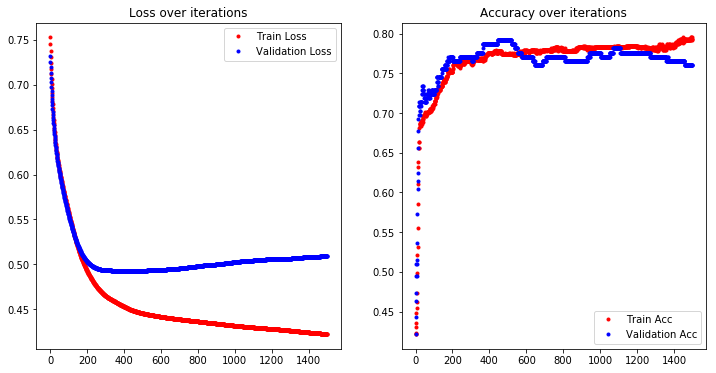

In [71]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["acc"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_acc"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')


accuracy is 0.760
roc-auc is 0.819


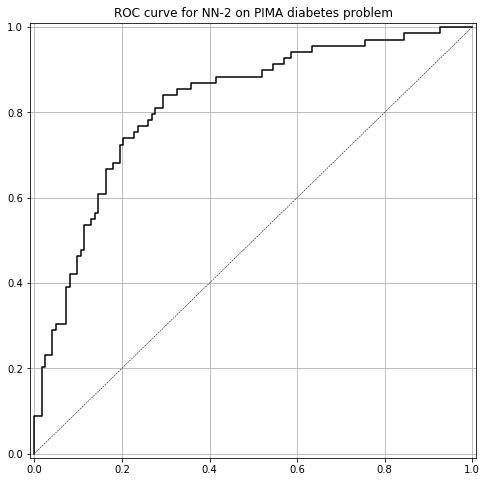

In [72]:
y_pred_class_nn_2 = model_2.predict_classes(X_test_norm)
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')
### END SOLUTION